In [3]:
import numpy as np
import cv2
from scipy.spatial.distance import squareform, pdist, cdist
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt

###Co3. Segmentation

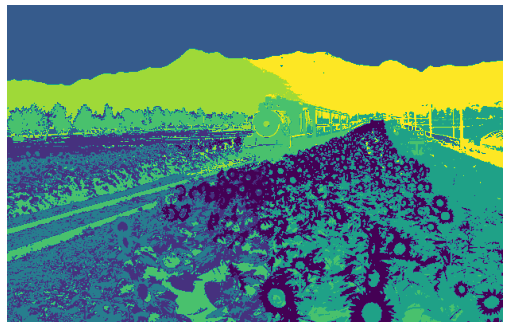

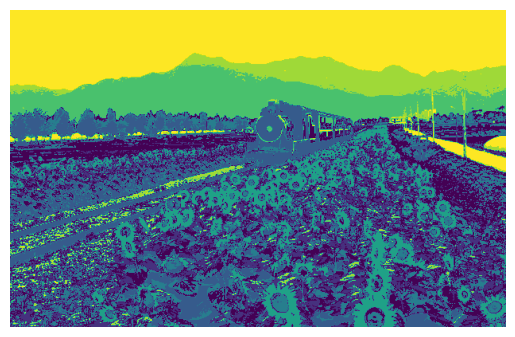

In [4]:
### Clustering Methods
def kmeans(features, k, num_iters=100):
    """ Use kmeans algorithm to group features into k clusters.

    K-Means algorithm can be broken down into following steps:
        1. Randomly initialize cluster centers
        2. Assign each point to the closest center
        3. Compute new center of each cluster
        4. Stop if cluster assignments did not change
        5. Go to step 2

    Args:
        features - Array of N features vectors. Each row represents a feature
            vector.
        k - Number of clusters to form.
        num_iters - Maximum number of iterations the algorithm will run.

    Returns:
        assignments - Array representing cluster assignment of each point.
            (e.g. i-th point is assigned to cluster assignments[i])
    """

    N, D = features.shape

    assert N >= k, 'Number of clusters cannot be greater than number of points'

    # Randomly initalize cluster centers
    idxs = np.random.choice(N, size=k, replace=False)
    centers = features[idxs]
    assignments = np.zeros(N, dtype=np.uint32)

    for n in range(num_iters):
        ### YOUR CODE HERE
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        for i in range(N):
            dis = np.linalg.norm(features[i] - centers, axis=1)
            assignments[i] = np.argmin(dis)

        new_centers = np.zeros((k, D))
        for j in range(k):
            points_in_cluster = features[assignments == j]
            if len(points_in_cluster) > 0:
                new_centers[j] = np.mean(points_in_cluster, axis=0)
            else:
                new_centers[j] = centers[j]
        if np.all(centers == new_centers):
            break

        centers = new_centers

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ### END YOUR CODE

    return assignments


### Pixel-Level Features
def color_features(img):
    """ Represents a pixel by its color.

    Args:
        img - array of shape (H, W, C)

    Returns:
        features - array of (H * W, C)
    """
    H, W, C = img.shape
    img = img_as_float(img)
    features = np.zeros((H*W, C))

    ### YOUR CODE HERE
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    features = img.reshape(-1, C)

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ### END YOUR CODE

    return features

def color_position_features(img):
    """ Represents a pixel by its color and position.

    Combine pixel's RGB value and xy coordinates into a feature vector.
    i.e. for a pixel of color (r, g, b) located at position (x, y) in the
    image. its feature vector would be (r, g, b, x, y).

    Don't forget to normalize features.

    Hints
    - You may find np.mgrid and np.dstack useful
    - You may use np.mean and np.std

    Args:
        img - array of shape (H, W, C)

    Returns:
        features - array of (H * W, C+2)
    """
    H, W, C = img.shape
    color = img_as_float(img)
    features = np.zeros((H*W, C+2))

    ### YOUR CODE HERE
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    x, y = np.mgrid[0:H, 0:W]
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)

    clr = color.reshape(-1, C)

    ft = np.hstack((clr, x, y))

    ft_mean = np.mean(ft, axis=0)
    ft_std = np.std(ft, axis=0)
    features = (features - ft_mean)/ft_std


    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ### END YOUR CODE

    return features

def my_features(img):
    """ Implement your own features

    Args:
        img - array of shape (H, W, C)

    Returns:
        features - array of (H * W, C)
    """
    features = None
    ### YOUR CODE HERE
    img = img_as_float(img)
    inten = color_position_features(img)
    clr = color_features(img)
    features = np.hstack((clr, inten))
    ### END YOUR CODE
    return features


# Load color image and define number of segments
img = io.imread('train.jpg')
num_segments = 8

H, W, C = img.shape

# Extract pixel-level features
features = my_features(img)

# Run clustering algorithm
assignments = kmeans(features, num_segments)

segments = assignments.reshape((H, W))

# Display segmentation
plt.imshow(segments, cmap='viridis')
plt.axis('off')
plt.show()